# Delhi Metro Network dataset Description

.Column Names: Look at the column names to get an idea of what kind of data is included. Common column names might include things like "Station Name", "Line Name", "Opening Date", "Layout Type", "Latitude", "Longitude", etc.

.Data Types: Check the data types of each column. This can help you understand what kind of data each column contains (e.g., strings, integers, floats, datetime objects).


.Summary Statistics: Calculate summary statistics for numerical columns (e.g., mean, median, min, max) to understand the distribution of the data.

Data Exploration: Perform exploratory data analysis (EDA)

In [ ]:
import pandas as pd
import numpy as np
import plotly.express as px


In [15]:
dnm=pd.read_csv(r'C:\Users\femif\OneDrive\Documents\Desktop\downloading items\Delhi-Metro-Network.csv')
dnm

,Station ID,Station Name,Distance from Start (km),Line,Opening Date,Station Layout,Latitude,Longitude
0,1,Jhil Mil,10.3,Red line,2008-04-06,Elevated,28.675790,77.312390
1,2,Welcome [Conn: Red],46.8,Pink line,2018-10-31,Elevated,28.671800,77.277560
2,3,DLF Phase 3,10.0,Rapid Metro,2013-11-14,Elevated,28.493600,77.093500
3,4,Okhla NSIC,23.8,Magenta line,2017-12-25,Elevated,28.554483,77.264849
4,5,Dwarka Mor,10.2,Blue line,2005-12-30,Elevated,28.619320,77.033260
...,...,...,...,...,...,...,...,...
280,281,Bata Chowk,38.3,Voilet line,2015-06-09,Elevated,28.385836,77.313462
281,282,Dwarka Sector 12,5.8,Blue line,2006-01-04,Elevated,28.592320,77.040510
282,283,Noida Sector 18,43.6,Blue line,2009-12-11,Elevated,28.570810,77.326120
283,284,Knowledge Park II,21.4,Aqua line,2019-01-25,Elevated,28.456867,77.500054


In [16]:
dnm.head()

,Station ID,Station Name,Distance from Start (km),Line,Opening Date,Station Layout,Latitude,Longitude
0,1,Jhil Mil,10.3,Red line,2008-04-06,Elevated,28.675790,77.312390
1,2,Welcome [Conn: Red],46.8,Pink line,2018-10-31,Elevated,28.671800,77.277560
2,3,DLF Phase 3,10.0,Rapid Metro,2013-11-14,Elevated,28.493600,77.093500
3,4,Okhla NSIC,23.8,Magenta line,2017-12-25,Elevated,28.554483,77.264849
4,5,Dwarka Mor,10.2,Blue line,2005-12-30,Elevated,28.619320,77.033260


In [17]:
dnm.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 285 entries, 0 to 284
Data columns (total 8 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Station ID                285 non-null    int64  
 1   Station Name              285 non-null    object 
 2   Distance from Start (km)  285 non-null    float64
 3   Line                      285 non-null    object 
 4   Opening Date              285 non-null    object 
 5   Station Layout            285 non-null    object 
 6   Latitude                  285 non-null    float64
 7   Longitude                 285 non-null    float64
dtypes: float64(3), int64(1), object(4)
memory usage: 17.9+ KB


In [18]:
dnm.describe()

,Station ID,Distance from Start (km),Latitude,Longitude
count,285.000000,285.000000,285.000000,285.000000
mean,143.000000,19.218947,28.595428,77.029315
std,82.416625,14.002862,0.091316,2.875400
min,1.000000,0.000000,27.920862,28.698807
25%,72.000000,7.300000,28.545828,77.107130
50%,143.000000,17.400000,28.613453,77.207220
75%,214.000000,28.800000,28.666360,77.281165
max,285.000000,52.700000,28.878965,77.554479


In [19]:
#chechk null values
dnm.isnull().sum()


Station ID                  0
Station Name                0
Distance from Start (km)    0
Line                        0
Opening Date                0
Station Layout              0
Latitude                    0
Longitude                   0
dtype: int64

In [20]:
# converting 'Opening Date' to datetime format
dnm['Opening Date'] = pd.to_datetime(dnm['Opening Date'])

In [21]:
dnm['Opening Date']

0     2008-04-06
1     2018-10-31
2     2013-11-14
3     2017-12-25
4     2005-12-30
         ...    
280   2015-06-09
281   2006-01-04
282   2009-12-11
283   2019-01-25
284   2009-12-11
Name: Opening Date, Length: 285, dtype: datetime64[ns]

In [31]:
stations_per_year 

2002     6
2003     4
2004    11
2005    28
2006     9
2008     3
2009    17
2010    54
2011    13
2013     5
2014     3
2015    13
2017    18
2018    64
2019    37
Name: Opening Year, dtype: int64

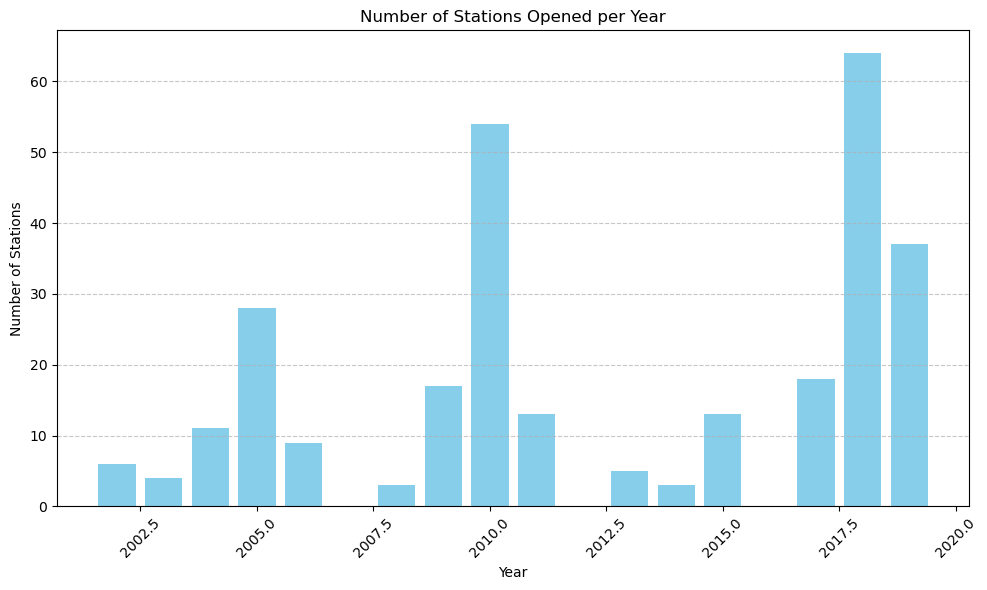

In [32]:
import matplotlib.pyplot as plt

dnm['Opening Year'] = dnm['Opening Date'].dt.year

stations_per_year = dnm['Opening Year'].value_counts().sort_index()
plt.figure(figsize=(10, 6))
plt.bar(stations_per_year.index, stations_per_year.values, color='skyblue')
plt.title('Number of Stations Opened per Year')
plt.xlabel('Year')
plt.ylabel('Number of Stations')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

I have checked here which year more number station was opened.we can see here that more network stations have opened in 2018 about 60 more network stations are opened.
fewest network station opening were in 2007,2014 and 2003



#### Station Layout Analysis

In [40]:
layout_counts=dnm['Station Layout'].value_counts()
layout_counts

Elevated       214
Underground     68
At-Grade         3
Name: Station Layout, dtype: int64

there are 3 type of layout elevated,underground,At-Grade

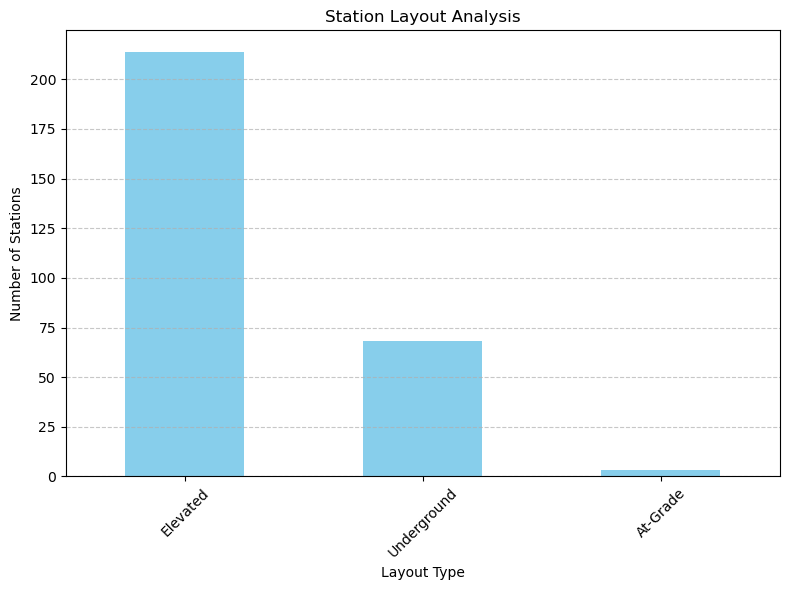

In [41]:
plt.figure(figsize=(8, 6))
layout_counts.plot(kind='bar', color='skyblue')
plt.title('Station Layout Analysis')
plt.xlabel('Layout Type')
plt.ylabel('Number of Stations')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

we can see highest number of station is elevated 2nd underground,3rd At_Grade

### Line Analysis

In [42]:
dnm['Line'].unique()

array(['Red line', 'Pink line', 'Rapid Metro', 'Magenta line',
       'Blue line', 'Aqua line', 'Voilet line', 'Yellow line',
       'Green line', 'Gray line', 'Orange line', 'Green line branch',
       'Blue line branch'], dtype=object)

<Axes: >

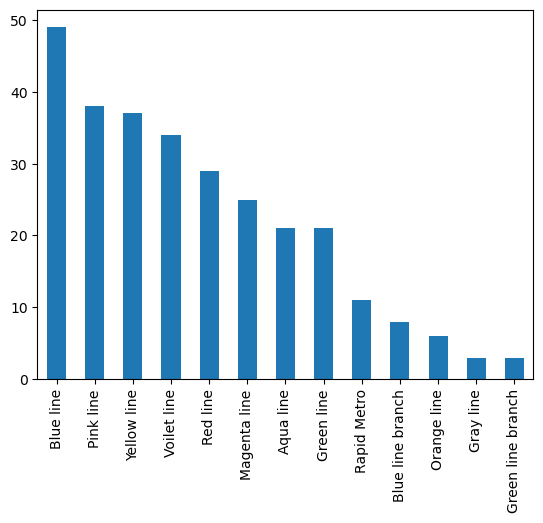

In [57]:
dnm['Line'].value_counts().plot(kind='bar')

Highest level metro line is blue line and lowest level metro line is gray line

In [50]:
total_distance_per_line = dnm.groupby('Line')['Station Layout'].value_counts()
total_distance_per_line


Line               Station Layout
Aqua line          Elevated          21
Blue line          Elevated          44
                   Underground        4
                   At-Grade           1
Blue line branch   Elevated           7
                   At-Grade           1
Gray line          Elevated           2
                   Underground        1
Green line         Elevated          21
Green line branch  Elevated           2
                   At-Grade           1
Magenta line       Underground       15
                   Elevated          10
Orange line        Underground        5
                   Elevated           1
Pink line          Elevated          26
                   Underground       12
Rapid Metro        Elevated          11
Red line           Elevated          29
Voilet line        Elevated          23
                   Underground       11
Yellow line        Underground       20
                   Elevated          17
Name: Station Layout, dtype: int64

<Axes: xlabel='Line,Station Layout'>

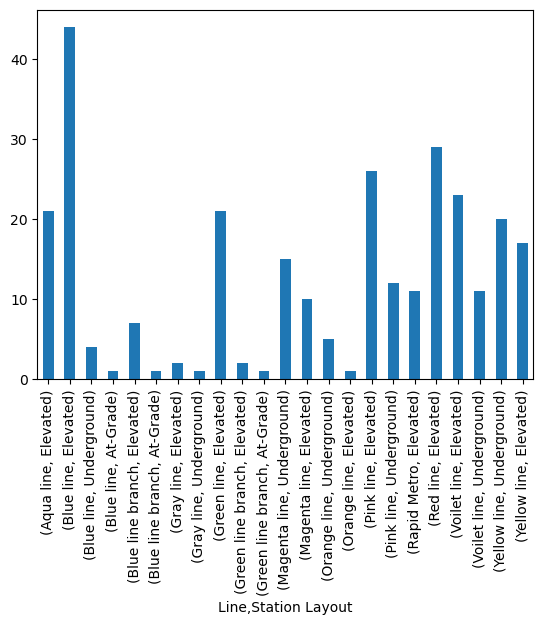

In [55]:
dnm.groupby('Line')['Station Layout'].value_counts().plot(kind='bar')

In [56]:
dnm['Station Name'].value_counts()

Yamuna Bank                 2
Ashok Park Main             2
Jahangirpuri                1
Rajiv Chowk [Conn: Blue]    1
IFFCO Chowk                 1
                           ..
Uttam Nagar East            1
Delhi Cantt                 1
Noida Sector 147            1
Maujpur                     1
Mayur Vihar Extention       1
Name: Station Name, Length: 283, dtype: int64